# Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,SpatialDropout1D
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/gdrive


In [13]:
# download dataset from: https://drive.google.com/drive/folders/1Ul6eqgvTcHpAipY9y3fhPiXBmpQQTPxX?usp=sharing or create shortcut of this folder to your drive and modify the path accordingly


true = pd.read_csv("/content/drive/MyDrive/fakenewsdetection/dataset/True.csv", usecols=['title','text','subject','date'])
false = pd.read_csv("/content/drive/MyDrive/fakenewsdetection/dataset/Fake.csv", usecols=['title','text','subject','date'])

# Data Visualization and Pre-processing

In [ ]:
true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [14]:
# Inserting nepali news data manually
Title = "Janamat Party quits Madhesh Province government"
Text = "JANAKPUR (Onlinekhabar)-Janamat Party withdrew its support and quit the Madhesh Province government.Minister for Education and Culture and Minister for Labour and Transport who were part of the provincial government on behalf of the Janamat Party submitted resignation letters to Chief Minister Saroj Kumar Yadav.Spokesperson of the Madhesh Province government and Minister for Home, Communications and Law Mohammad Samim informed that the ministers from the Janamat Party had collectively submitted their resignation to Chief Minister Yadav.Earlier, Janamat Party’s parliamentary party leader and Minister for Education and Culture Mahesh Prasad Yadav had submitted a letter to the Province’s Chief Hari Shanker Mishra withdrawing its support to the government.Yadav shared that the ministers from the Janamat Party had resigned since the government after a year of its formation failed to perform effectively and did not allow the atmosphere for the ministers of his party to function well.The Janamat Party has 13 province assembly members in the Madhesh Pradesh."
true.loc[len(true.index)] = {'title': Title, 'text': Text, 'subject': 'politicsNews', 'date': 'January 24, 2024'}

Title = "Nepali Congress leaders submit 1,061 signatures calling for Hindu nation to Sher Bahadur Deuba"
Text = "KATHMANDU(Onlinekhabar)-Nepali Congress leaders who are part of the campaign to establish a Hindu nation have submitted the signatures of 1,061 people to the party president, Sher Bahadur Deuba.Lokesh Dhakal, the co-coordinator of the campaign, 42 central members, including former Dr Shanshak Koirala, have signed it.Campaign members were collecting signatures from the first day of the Mahasamiti meeting, which started on Monday. In front of the Mahasamiti meeting hall at Godavari Sunrise Convention Center, the leaders of the campaign had set up a tent to collect signatures.The agenda of establishing a Hindu nation, however, was not discussed in the Mahasamiti meeting.In the previous Mahasamiti meeting as well, 714 people signed in favour of a Hindu nation and submitted it to the party president. Additionally, 22 central members submitted their signatures to Deuba along with the demand to include the agenda for discussion in the Mahasamiti meeting regarding the establishment of a Hindu nation."
true.loc[len(true.index)]= {'title': Title, 'text': Text, 'subject': 'politicsNews', 'date': 'February 22, 2024'}


Title = "Pushpa Kamal Dahal calls for unity among progressive forces to institutionalise achievements"
Text = "KATHMANDU(Onlinekhabar)-Prime Minister and CPN (Maoist Centre) Chair Pushpa Kamal Dahal has said time demands all forces that advocated for and contributed to bringing about change to unite.In his address to a party programme on the occasion of the 29th People’s War Day on February 13, leader Dahal was of the view that institutionalisation of the political achievements so far is possible only through unity among progressive forces.He also utilised the moment to call on Maoist leaders and cadres to take responsibility for protecting the achievements of the people’s war. Highlighting the challenges faced, he warned that some forces are attempting to reverse the accomplishments made in the areas of socialism, good governance, social justice, and prosperity.Party Chair Dahal also welcomed newcomers to the party from Dang and Surkhet who formally joined the party. Party Standing Committee member and Minister for Communication and Information Technology, Rekha Sharma, was also present on the occasion.The party observed Fagun 1 each year in the Nepali calendar as the People’s War Day in commemoration of the formal commencement of the People’s War (1996-2005)."
true.loc[len(true.index)] = {'title': Title, 'text': Text, 'subject': 'politicsNews', 'date': 'February 13, 2024'}


Title = "PM Dahal urges swift action on cooperative challenges and enhanced regulation"
Text = "KATHMANDU(Onlinekhabar)-Prime Minister Pushpa Kamal Dahal has instructed the prompt resolution of issues about cooperatives.The directive was issued during a discussion held on Wednesday in Baluwatar, where Prime Minister Dahal conveyed his instructions to relevant ministries and agencies. Emphasising the need for provisions in the Act that elevate cooperatives as the building blocks of socialism, Prime Minister Dahal underscored the importance of focusing on collectivism and the interests of the lower class. He advocated for the organisation of cooperatives through the adoption of both long-term and immediate measures to address their challenges. Prime Minister Dahal specifically directed the Ministry of Land Management, Cooperatives, and Poverty Alleviation, along with other pertinent agencies, to undertake necessary groundwork in both immediate and long-term approaches to resolving cooperative issues. He emphasised the creation of an effective regulatory body for monitoring cooperatives. In his instructions, Prime Minister Dahal urged the existing regulatory organisations associated with cooperatives to categorise them as either sound, distressed, or submerged and to submit a comprehensive report. He also stressed the importance of safeguarding the funds deposited by savers in cooperatives, calling for effective measures to be implemented in coordination with all three levels of government."
true.loc[len(true.index)] = {'title': Title, 'text': Text, 'subject': 'politicsNews', 'date': 'January 17, 2024'}


Title = "Ukraine sets conditions for release of Nepalis under its custody"
Text = "KATHMANDU(Onlinekhabar)-Ukraine has set a condition for the release of Nepalis captured from the battlefield after joining the Russian Army. While it is reported that Ukraine has taken a certain position and set certain conditions in response to diplomatic efforts led by the Ministry of Foreign Affairs on behalf of Nepal, the exact nature of this position remains unclear.According to diplomatic sources, Nepal is actively pursuing initiatives to release its citizens serving in the Russian Army through the Ministry of Foreign Affairs, the Ukrainian embassy in Delhi, and its embassy in Germany.Ukraine, however, has not provided a formal response to Nepal’s correspondence at this point. However, diplomatic channels indicate that Ukraine has communicated certain requirements or commitments it expects from Nepal to release these individuals.“Until now, Ukraine has not sent any official response to the diplomatic notes sent by Nepal. But it is understood that they are looking for a commitment about what will happen after their release”, a high-ranking government source told Onlinekhabar on the condition of anonymity. “Nepal is waiting for a concrete formal answer from Ukraine. Till then, Nepal is engaging in internal discussions to determine the legal commitments it is willing to make.”As of now, the number of Nepalis who enlisted in the Russian Army and were apprehended by Ukrainian security forces has risen to four, with six reported dead. While data is available for those captured by Ukrainian forces, the numbers for Nepalis in other Russian military units remain unconfirmed.Foreign Minister NP Saud has confirmed that the Ministry of Foreign Affairs has initiated diplomatic efforts for the release of the four Nepalis held by Ukrainian security forces. However, he did not provide specific details regarding the nature of these initiatives or the progress made in the diplomatic process.“We are seeking help from the embassy of Ukraine in Delhi and the Nepali embassy in Germany. We hope to find a way to bring them back soon,” said Saud.Saud, however, did not want to talk about the conditions put forward by Ukraine.“We are more focused on what we can do to bring them back at the earliest rather than focussing on the conditions,” he said.According to sources, Ukraine is awaiting a response from Nepal regarding the matter of preventing Nepalis individuals from participating in the war by enlisting in the Russian Army. Additionally, Ukraine is seeking clarification on the legal actions Nepal intends to take after the repatriation of Nepalis currently under Ukrainian control.As of now, the exact number of Nepalis enlisting in the Russian Army is not confirmed, but it is believed to be around 500 individuals."
true.loc[len(true.index)] = {'title': Title, 'text': Text, 'subject': 'politicsNews', 'date': 'December 15, 2023'}





In [ ]:
true.tail()

,title,text,subject,date
21417,Janamat Party quits Madhesh Province government,JANAKPUR (Onlinekhabar)-Janamat Party withdrew...,politicsNews,"January 24, 2024"
21418,"Nepali Congress leaders submit 1,061 signature...",KATHMANDU(Onlinekhabar)-Nepali Congress leader...,politicsNews,"February 22, 2024"
21419,Pushpa Kamal Dahal calls for unity among progr...,KATHMANDU(Onlinekhabar)-Prime Minister and CPN...,politicsNews,"February 13, 2024"
21420,PM Dahal urges swift action on cooperative cha...,KATHMANDU(Onlinekhabar)-Prime Minister Pushpa ...,politicsNews,"January 17, 2024"
21421,Ukraine sets conditions for release of Nepalis...,KATHMANDU(Onlinekhabar)-Ukraine has set a cond...,politicsNews,"December 15, 2023"


In [ ]:
false.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [15]:
# Inserting nepali news data manually
Title = "Ncell paid over 2 billion in royalty and RTDF"
Text = "KATHMANDU(Onlinekhabar)-Ncell has contributed the most to royalty and the Rural Telecommunication Development Fund (RTDF) in the last fiscal year. According to the Nepal Telecommunication Authority, Ncell has paid over Rs 2 billion in revenue in the last fiscal year.This company paid Rs 1.47 billion as royalty and Rs 703.75 million to the government as RTDF in the last fiscal year 2022/23. The amount paid to the government in 2021/22 was Rs 1.58 billion. Similarly, the contribution to RTDF was Rs 709.1 million.According to the provisions of the NEA, all service providers must pay four per cent royalty and two per cent RTDF of their income annually by mid-January (end of Nepali month Poush) according to the Telecommunications Act 1997 and Telecommunications Regulations 1998.According to the NEA, only 31 companies have submitted the royalty and RTDF of the last fiscal year 2022/2023, which includes Nepal Telecom, Ncell, Worldlink, etc. There are 121 such companies in operation and 90 companies still have to pay the fee.According to the NEA, so far this year Rs 4.821 billion royalty and RTDF amount has been collected."
false.loc[len(false.index)] = {'title': Title, 'text': Text, 'subject': 'News', 'date': 'February 22, 2024'}

Title = "Preparation to hand over paragliding and zipline regulations to the local level"
Text = "KATHMANDU(Onlinekhabar)-The government has proposed to give the regulation of paragliding and zipline-related services to the local level.In the draft of the bill prepared for the amendment of the Local Government Operation Act 2017, it has been proposed to assign the regulation and management of paragliding and zipline to the local level.The bill also proposes that the local level can declare tourist and cultural areas within their area only according to the criteria determined by the federal government. Currently, there is a provision in the Act that the local government can make such an announcement without any criteria if it wishes.The Act mentions that the local level can now create, implement and regulate policies and legal standards related to cooperatives in a way that does not conflict with the laws of the corporations and provincial governments."
false.loc[len(false.index)]= {'title': Title, 'text': Text, 'subject': 'News', 'date': 'February 16, 2024'}


Title = "Sugar industries facing sugarcane shortage"
Text = "NAWALPARASI(Onlinekhabar)-Sugar industries in Nawalparasi West have been facing a shortage of sugarcane, the main raw material for the industries. As a result, the sugar industries here have not been able to operate at full capacity.Since sugarcane production was not as expected in Nawalparasi West the sugar industries were forced to purchase sugarcane from outside districts. As a result, industrialists have said that the cost has increased.The Sunwal-based Lumbini Sugar Industry is purchasing sugarcane from Kapilvastu and Nawalparasi East. Head of administration of the Industry, Kush Subedi, said that due to the lack of sufficient sugarcane production in the district sugarcane had to be imported from other districts. He said that the industry has purchased 15,000 quintals of sugarcane this year from Kapilvastu alone.Three big sugar industries in the district have said that they are not able to function as per their target due to the shortage of sugarcane.The Bagmati Khadsari Sugar Industry in Susta and Indira Sugar Agro Industries Pvt. Ltd. in Pratappur also stated that due to a lack of sugarcane, they could not function to their full capacity. A total of four sugar factories are operating in the district.Meanwhile, due to non-payment for their produce for a long time, the farmers are gradually turning to alternative crops for farming."
false.loc[len(false.index)] = {'title': Title, 'text': Text, 'subject': 'News', 'date': 'February 15, 2024'}


Title = "Nepal to play at least 15 T20I matches before World Cup"
Text = "KATHMANDU(Onlinekhabar)-Nepal will play at least 15 T20I matches between now and the 2024 T20 World Cup. Nepal is set to participate in the T20 World Cup, to be held in the US and West Indies from June 2 onwards. Nepal have been drawn in Group D alongside South Africa, Sri Lanka, Bangladesh, and the Netherlands.In anticipation of the T20 World Cup, Nepal has initiated special preparations. It has been confirmed that Nepal will play in at least 15 T20I matches before the tournament starting with the triangular T20I series against the Netherlands and Namibia after completing of the ongoing CWC League 2 series.The triangular T20I series featuring Nepal, Namibia, and the Netherlands is scheduled to take place from February 27 to March 5. Each team will play two matches in the series, with the top two teams advancing to the final. Nepal is set to play a minimum of four and a maximum of five matches during this series.Following the triangular series, Nepal will travel to Hong Kong for a four-nation T20I series involving Nepal, Hong Kong, UAE, and Oman. Nepal is guaranteed to participate in at least three matches. However, details regarding this series are yet to be officially announced.Subsequently, Nepal will travel to India to compete in a triangular T20 series against Gujarat and Baroda. This series will be held from March 31 to April 7, featuring two matches each followed by a final between the top two teams.After the series in India, Nepal will head to Oman to participate in the ACC Premier Cup, specifically the ACC T20 Premier Cup, scheduled from April 10 to April 23. During the group stage, Nepal will play in a minimum of four matches. If they progress to the final via the semi-finals, they will play two additional matches.All matches apart from the ones in India will be officially recognised as T20Is.With a chance at reaching the final and ICC’s warm-up matches before the world cup along with its series in India, Nepal might likely play around 25 to 30 matches before they face the Netherlands in their first match on June 4."
false.loc[len(false.index)] = {'title': Title, 'text': Text, 'subject': 'News', 'date': 'January 17, 2024'}


Title = "Dipendra Singh Airee signs for ILT20 team Gulf Giants"
Text = "KATHMANDU(Onlinekhabar)-Nepali all-rounder Dipendra Singh Airee has been signed by International League T20 franchise team Gulf Giants.Gulf Giants, based in the UAE, said their scouting team had been monitoring Airee’s recent performances for Nepal and had selected him for his all-round cricketing skills.“I am honoured to be a part of Gulf Giants in ILT20. It’s a fantastic opportunity, and I am eager to contribute to the team’s success. I appreciate the confidence the franchise has shown in my abilities, and I am ready to give my best on the field,” said Airee after signing for the Gulf Giants.Dipendra Singh Airee made a name globally after hitting a record nine-ball half-century against Mongolia during the Asian Games in China."
false.loc[len(false.index)] = {'title': Title, 'text': Text, 'subject': 'News', 'date': 'February 8, 2024'}





In [ ]:
false.tail()

,title,text,subject,date
23481,Ncell paid over 2 billion in royalty and RTDF,KATHMANDU(Onlinekhabar)-Ncell has contributed ...,News,"February 22, 2024"
23482,Preparation to hand over paragliding and zipli...,KATHMANDU(Onlinekhabar)-The government has pro...,News,"February 16, 2024"
23483,Sugar industries facing sugarcane shortage,NAWALPARASI(Onlinekhabar)-Sugar industries in ...,News,"February 15, 2024"
23484,Nepal to play at least 15 T20I matches before ...,KATHMANDU(Onlinekhabar)-Nepal will play at lea...,News,"January 17, 2024"
23485,Dipendra Singh Airee signs for ILT20 team Gulf...,KATHMANDU(Onlinekhabar)-Nepali all-rounder Dip...,News,"February 8, 2024"


In [16]:
true['category'] = 1
false['category'] = 0

In [17]:
df = pd.concat([true,false])

In [ ]:
sns.set_style("darkgrid")
sns.countplot(df.category)

In [ ]:
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [ ]:
df.title.count()

44908

In [ ]:
df.subject.value_counts()

politicsNews       11277
worldnews          10145
News                9055
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

# Categories of arcticles

<ipython-input-37-8a7d6c397771>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

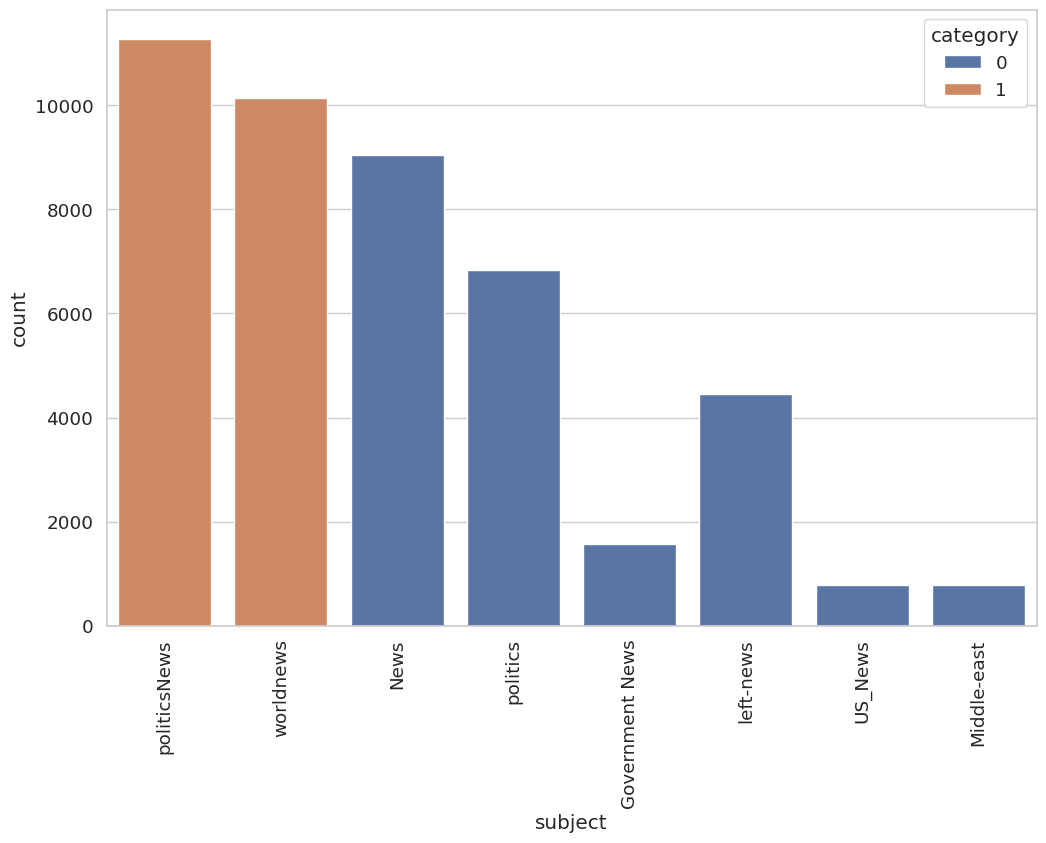

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "category" , data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [18]:
df['text'] = df['text'] + " " + df['title']
del df['title']
del df['subject']
del df['date']

In [19]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Data cleaning

In [20]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_urls(text)
    text = remove_stopwords(text)
    return text

df['text']=df['text'].apply(denoise_text)

<ipython-input-20-210062d1a14a>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [11]:
df.head()

,text,category
0,WASHINGTON (Reuters) head conservative Republi...,1
1,WASHINGTON (Reuters) Transgender people allowe...,1
2,WASHINGTON (Reuters) special counsel investiga...,1
3,WASHINGTON (Reuters) Trump campaign adviser Ge...,1
4,SEATTLE/WASHINGTON (Reuters) President Donald ...,1


In [12]:
df.to_csv("/content/gdrive/MyDrive/fakenewsdetection/dataset/data.csv", index=False)

# Word cloud for Real articles

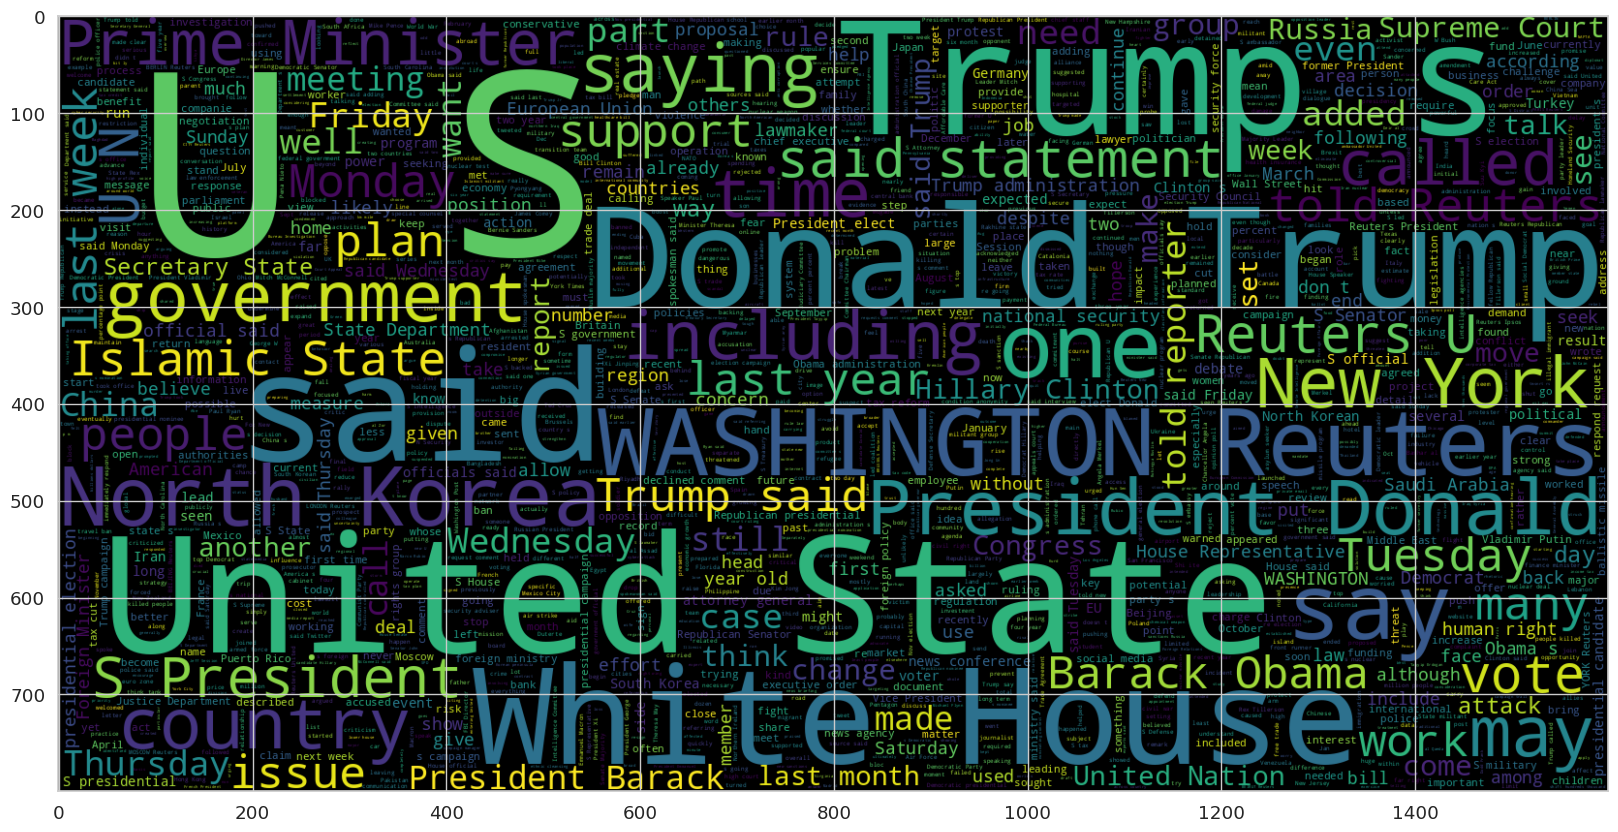

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

# Word cloud for fake articles

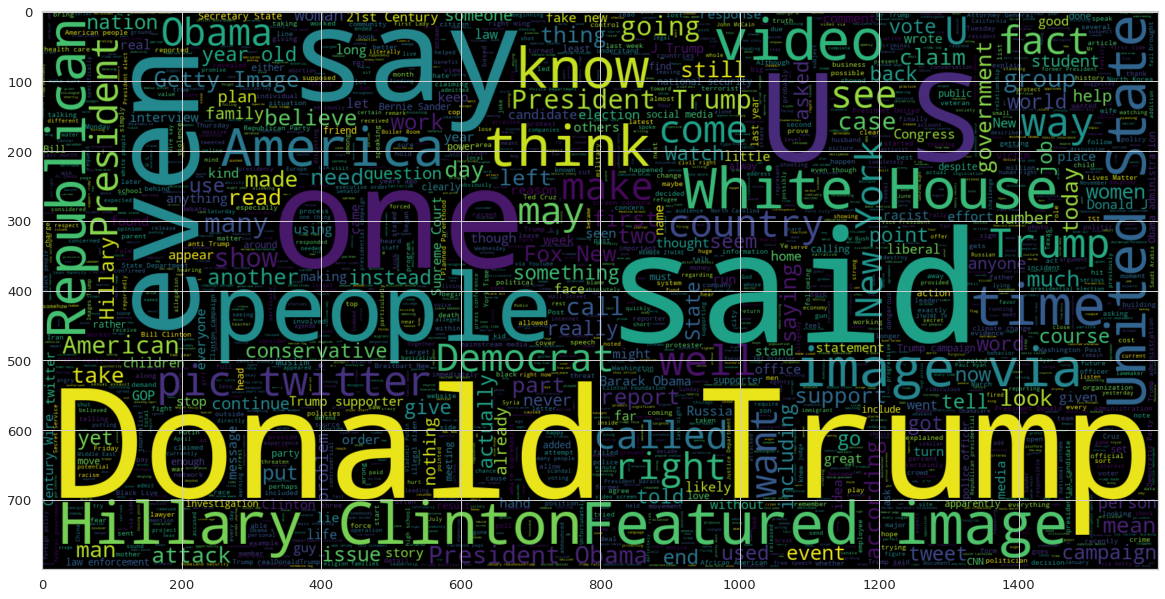

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

# Number of words in texts

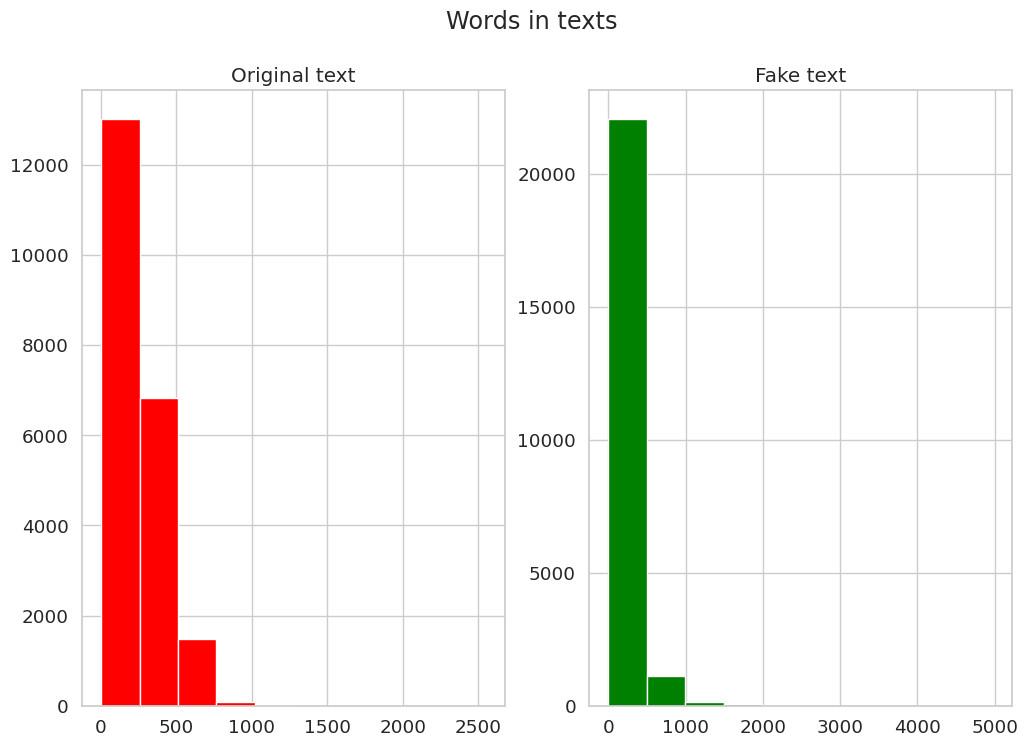

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

# Average length of words in text

<ipython-input-43-cbef104b9346>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-43-cbef104b9346>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level fu

Text(0.5, 0.98, 'Average word length in each text')

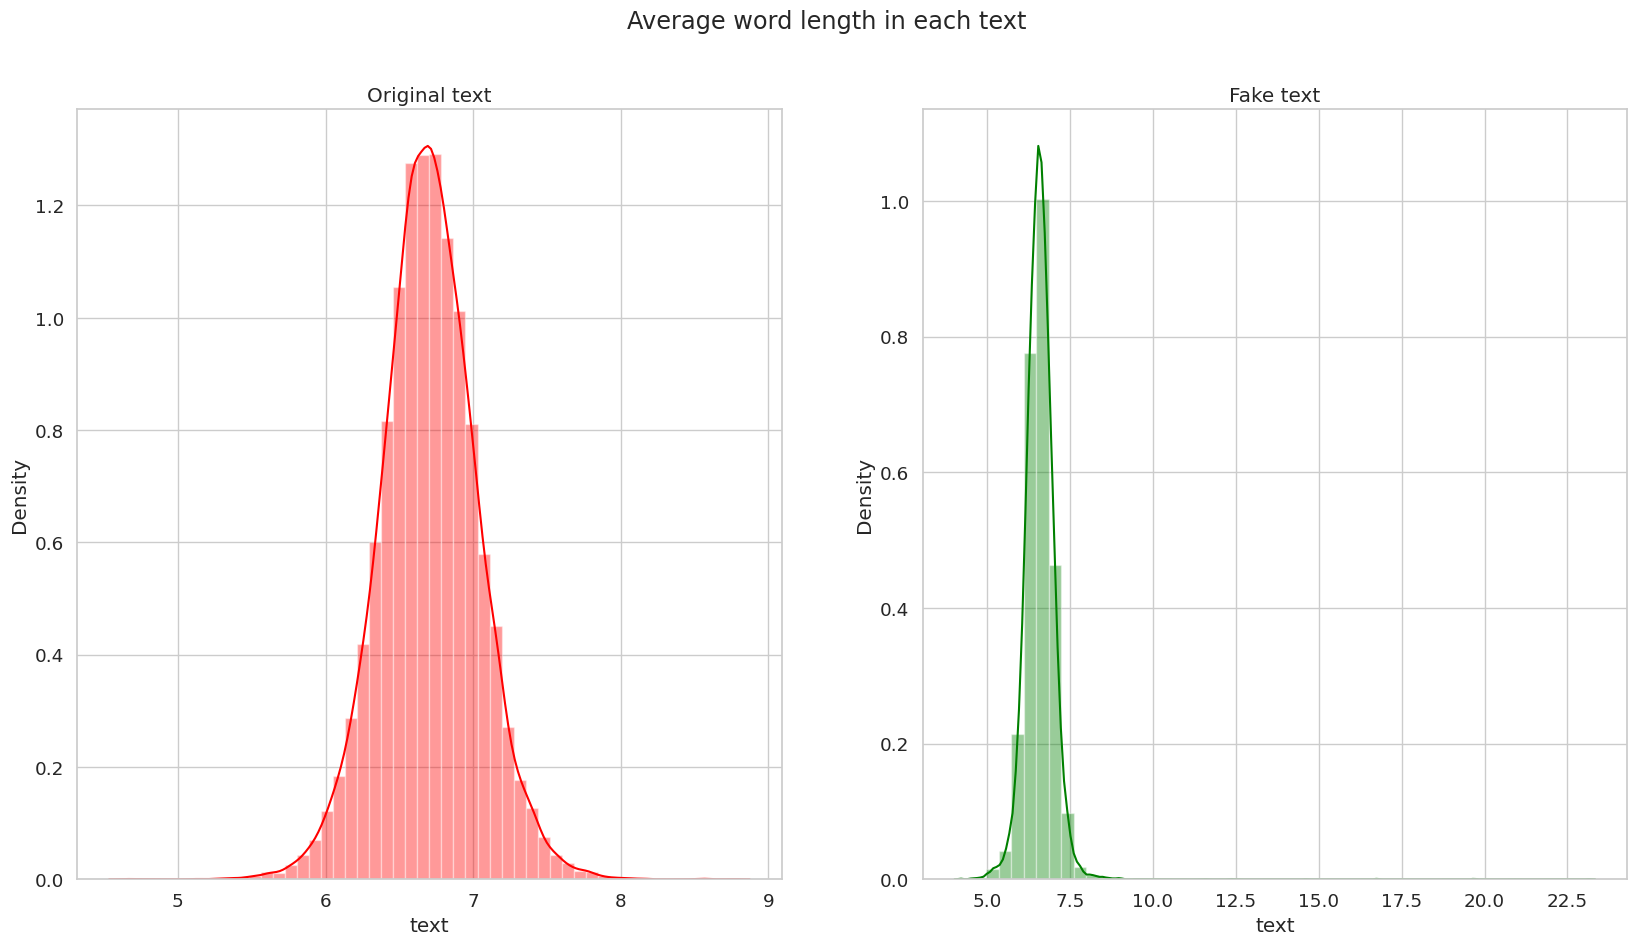

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [21]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)
corpus[:5]

['WASHINGTON', '(Reuters)', 'head', 'conservative', 'Republican']

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Trump': 111486,
 'said': 93152,
 'would': 54601,
 'U.S.': 50430,
 'President': 33171,
 'people': 33109,
 'also': 30322,
 'one': 29363,
 'Donald': 27796,
 'said.': 26193}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Unigram Analysis

<Axes: >

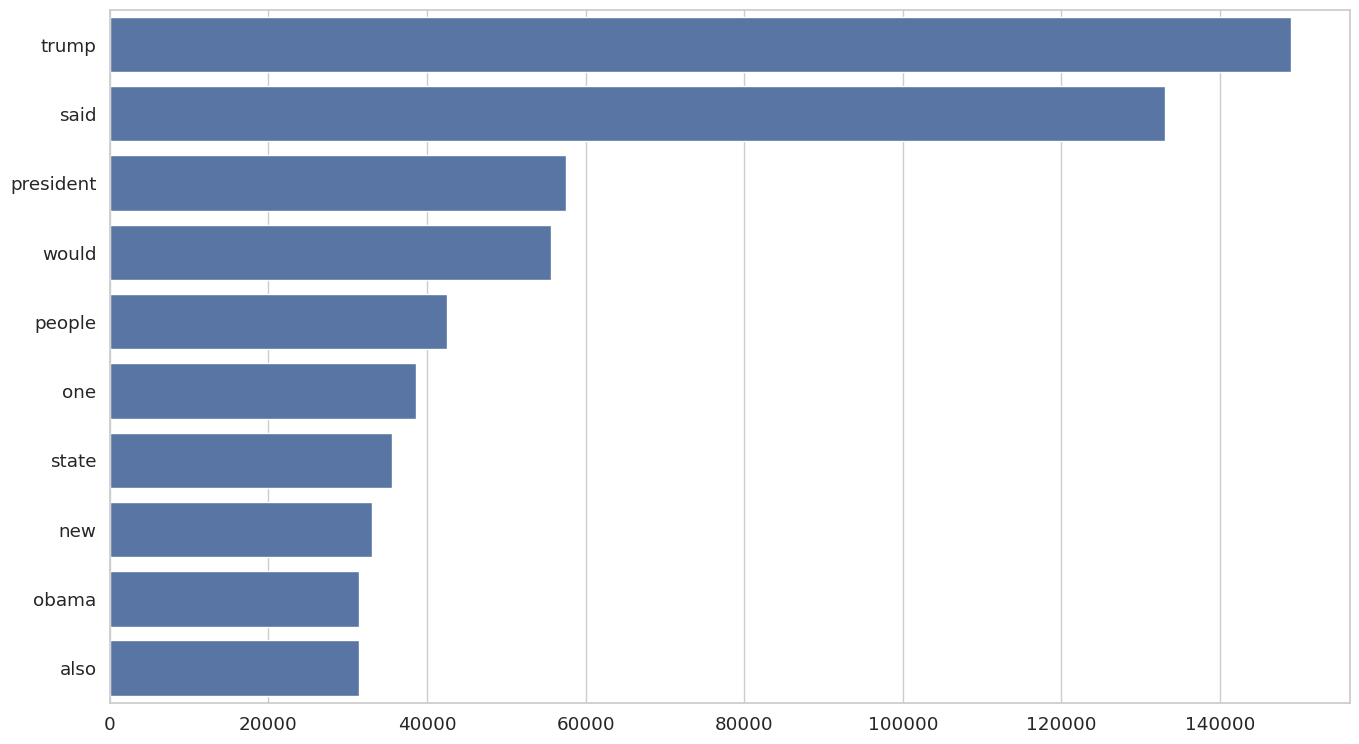

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

# Bigram Analysis

<Axes: >

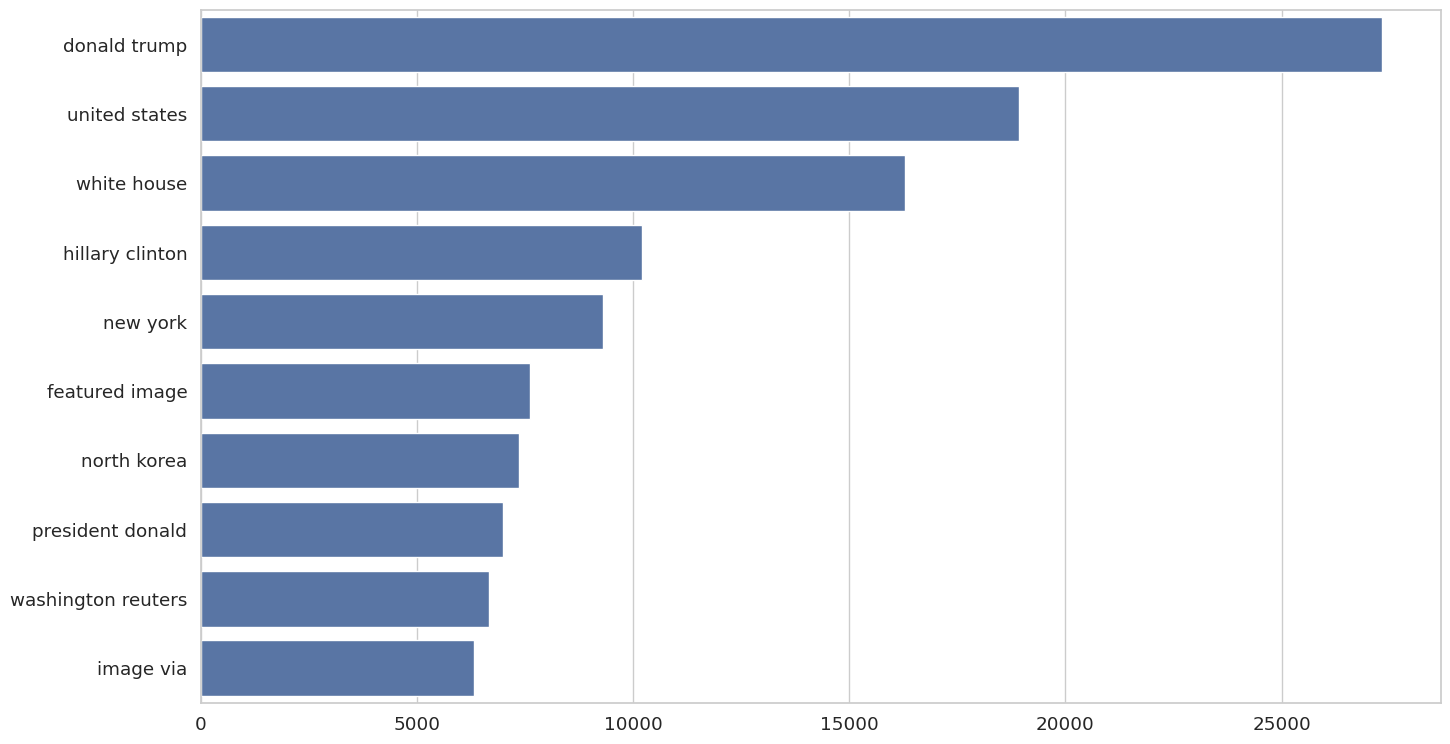

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

# Trigram Analysis

<Axes: >

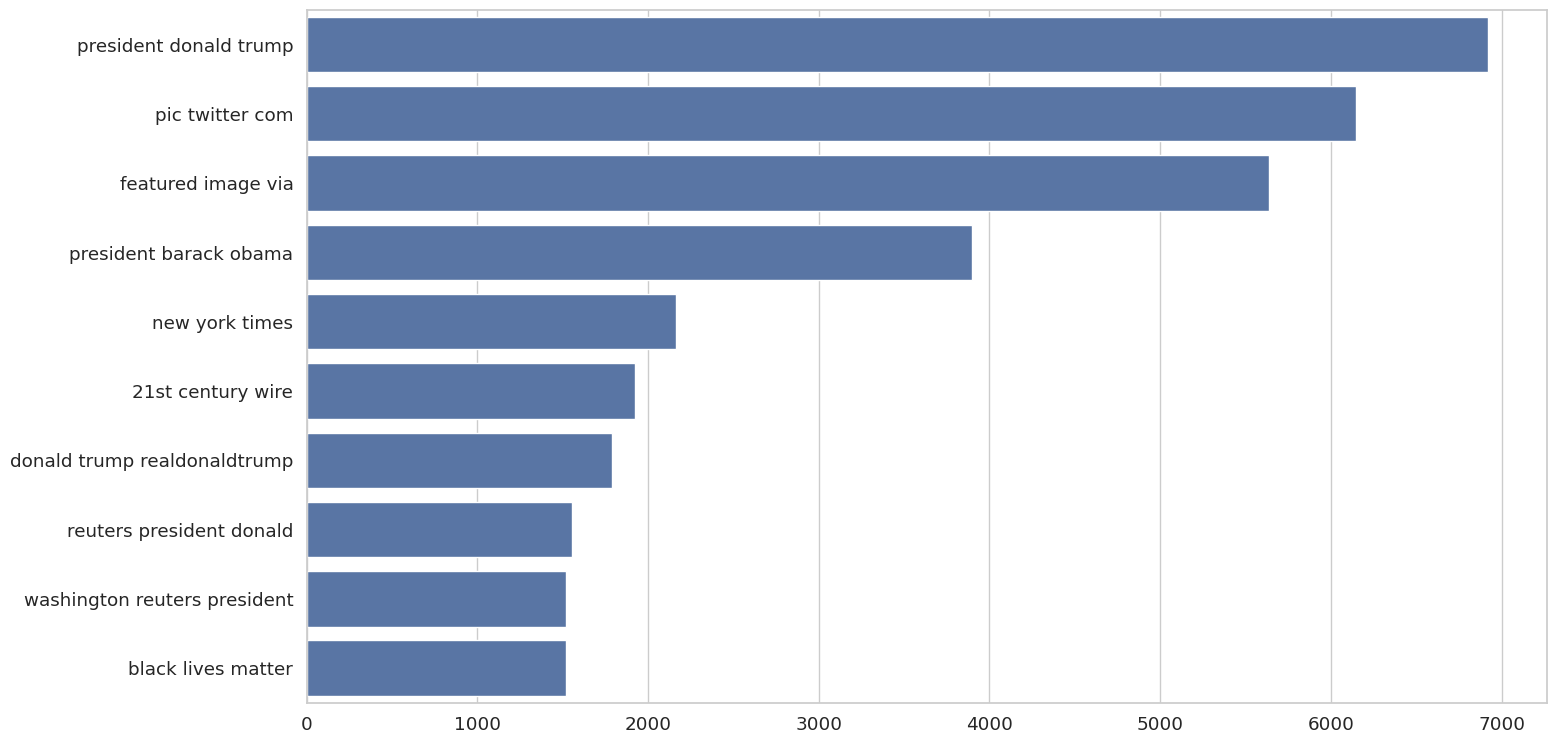

In [ ]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

# splitting dataset into train and test set

In [22]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.category,random_state = 42)

In [6]:
max_features = 10000
maxlen = 300

In [23]:
import pickle
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
# # Save the tokenizer to a file using pickle
# with open('tokenizer.pkl', 'wb') as tokenizer_file:
#     pickle.dump(tokenizer.word_index, tokenizer_file)

tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [24]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

# GloVe Embedding

In [25]:
EMBEDDING_FILE = "/content/drive/MyDrive/fakenewsdetection/glove6B/glove.6B.100d.txt"

In [26]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [27]:
all_embs = np.stack(list(embeddings_index.values()))

emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))

embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [ ]:
np.save('embedding_matrix.npy', embedding_matrix)

# Building the model

In [32]:
batch_size = 256
epochs = 5
embed_size = 100

In [21]:
# from tensorflow.keras.callbacks import EarlyStopping
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)


# # Define early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [28]:
model = Sequential()
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.2 , dropout = 0.2))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

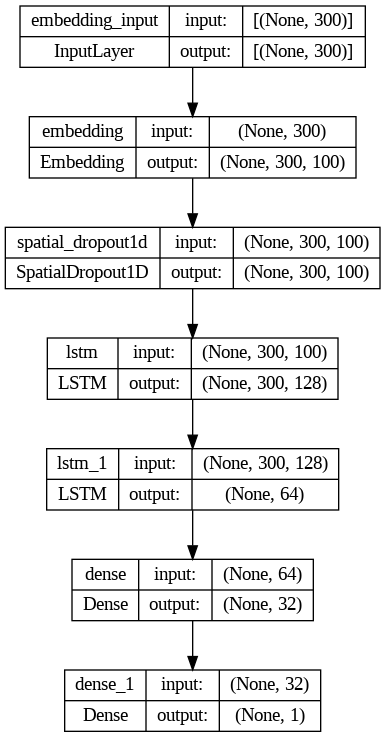

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_flow_chart.png', show_shapes=True, show_layer_names=True)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 300, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 300, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                        

# Training the model

In [33]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs)

Epoch 1/5
132/132 [==============================] - 740s 6s/step - loss: 0.2542 - accuracy: 0.8962 - val_loss: 0.1536 - val_accuracy: 0.9420
Epoch 2/5
132/132 [==============================] - 757s 6s/step - loss: 0.1376 - accuracy: 0.9463 - val_loss: 0.1187 - val_accuracy: 0.9533
Epoch 3/5
132/132 [==============================] - 756s 6s/step - loss: 0.1021 - accuracy: 0.9617 - val_loss: 0.0837 - val_accuracy: 0.9662
Epoch 4/5
132/132 [==============================] - 751s 6s/step - loss: 0.0670 - accuracy: 0.9753 - val_loss: 0.0298 - val_accuracy: 0.9908
Epoch 5/5
132/132 [==============================] - 752s 6s/step - loss: 0.0418 - accuracy: 0.9862 - val_loss: 0.0232 - val_accuracy: 0.9917


# Model performance

In [34]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1053/1053 [==============================] - 202s 191ms/step - loss: 0.0199 - accuracy: 0.9931
Accuracy of the model on Training Data is -  99.31415319442749 %
351/351 [==============================] - 65s 186ms/step - loss: 0.0232 - accuracy: 0.9917
Accuracy of the model on Testing Data is -  99.17163848876953 %


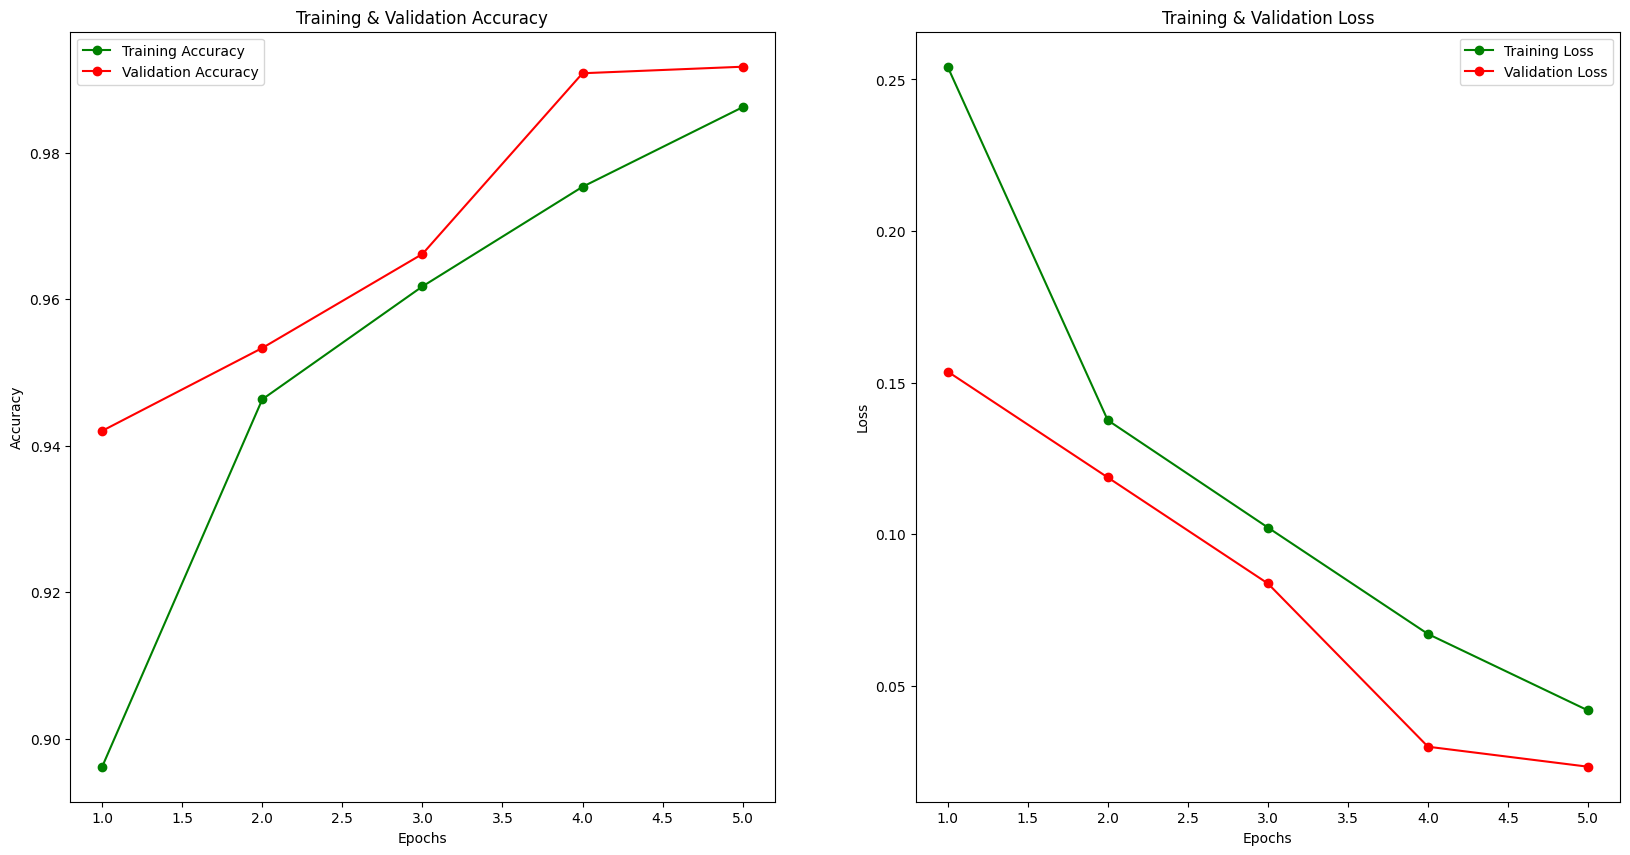

In [36]:
epochs = [i for i in range(1,6)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

351/351 [==============================] - 66s 187ms/step


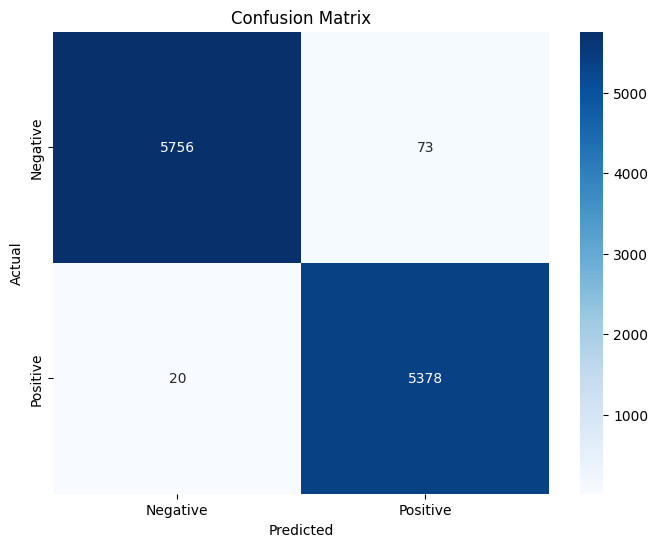

In [37]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_predictions = model.predict(X_test)
test_predictions_binary = np.round(test_predictions).flatten()

# Calculate confusion matrix
cm = confusion_matrix(y_test, test_predictions_binary)

# Print confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [38]:
from tensorflow.keras.models import save_model

# Assuming 'model' is your trained Keras model
model.save('/content/drive/MyDrive/fakenewsdetection/models/final_model.h5')  # Save the model in HDF5 format

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
